problem 3: Object Detection :                      
* Understand the definition of object detection: (url)
* Describe the difference between Object Localization & Object Detection?
* Explore the ILSVRC2014 dataset (url). Understand the format of the annotations.
* Randomly select 100 images and draw the ground truth bounding boxes along with the corresponding class label.
* What can be the metric to validate the model predictions? You have done this before.
* Oftentimes, the model will produce multiple detections for the same object. As a post-processing step, a non-maxima suppression algorithm selects the best box, filtering the rest. Read about non-maxima suppression here - (url). Implement the non-maxima suppression algorithm by creating random boxes by distorting a ground truth box. Visualize the best box that the non-maxima suppression algo produces

1) Object detection:
  
                  Object detection is a computer vision technique that involves identifying and locating objects within an image or a video. The goal is to recognize and locate objects of interest, usually within a scene. Object detection can be broken down into two main tasks:

-> Classification: Assigning a class label to each detected object. For example, in an image containing cars, people, and trees, the system should be able to label each detected object as car, person, or tree.

-> Localization: Estimating the spatial extent of each detected object, typically by defining a bounding box that encloses the object. This bounding box provides information about where the object is located within the image.

2) Difference between object localization and object detection:

  * Localization :It is the process of identifying the location of an object within an image or a frame. It involves determining where in the image the object is located and drawing a bounding box around it to indicate its position.

  * Detection: It involves not only locating objects within an image but also identifying what those objects are. It goes beyond localization by recognizing and labeling the objects present in the image, often by assigning them to predefined categories or classes . so, localization is about finding where an object is, while detection is about both finding where objects are and determining what they are.

Importing Libraries: 

In [26]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Dataset and Annotation Directories:

In [27]:
dataset_dir = r"C:\object\dataset"
annotation_dir = r"C:\object\annotation"

categories = ["indian cobra", "sea snake", "water snake"]

Calculate IoU :

In [28]:
# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

Function For NMS :


In [29]:
# Function for non-maximum suppression (NMS) with modified conditions
def aspect_ratio(box):
    width = box[2] - box[0]
    height = box[3] - box[1]
    return width / height

def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])

def is_different_shape(box1, box2):
    area_threshold = 0.5 
    return abs(aspect_ratio(box1) - aspect_ratio(box2)) > aspect_ratio_threshold \
        or abs(area(box1) - area(box2)) > area_threshold

def non_max_suppression(boxes, threshold_iou=0.5, threshold_probability=0.5):
    if len(boxes) == 0:
        return []

    # Filter boxes based on probability threshold
    filtered_boxes = [box for box in boxes if box[4] >= threshold_probability]

    if len(filtered_boxes) == 0:
        return []

    # Sort boxes by probability in descending order
    sorted_boxes = sorted(filtered_boxes, key=lambda x: x[4], reverse=True)
    selected_boxes = []

    highest_prob_box = sorted_boxes[0]  # Get the box with highest probability
    for box in sorted_boxes:
        if box == highest_prob_box:  # Skip comparing with itself
            continue
        iou = calculate_iou(box[:4], highest_prob_box[:4])
        if iou > threshold_iou:
            continue
        if is_different_shape(box[:4], highest_prob_box[:4]):
            selected_boxes.append(box)

    # Add the box with highest probability after checking for overlaps
    selected_boxes.append(highest_prob_box)

    return selected_boxes

Plot annotations and NMS :

Annotation file not found for image: n01748264_11947.JPEG


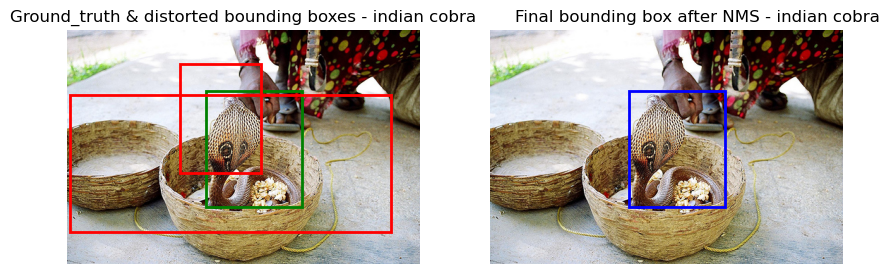

Annotation file not found for image: n01748264_13150.JPEG
Annotation file not found for image: n01748264_8721.JPEG
Annotation file not found for image: n01748264_5498.JPEG


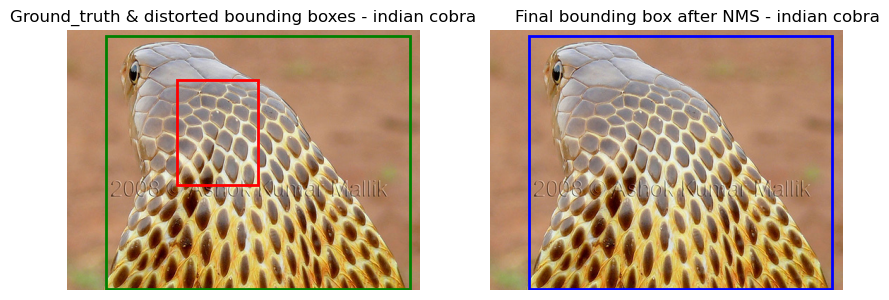

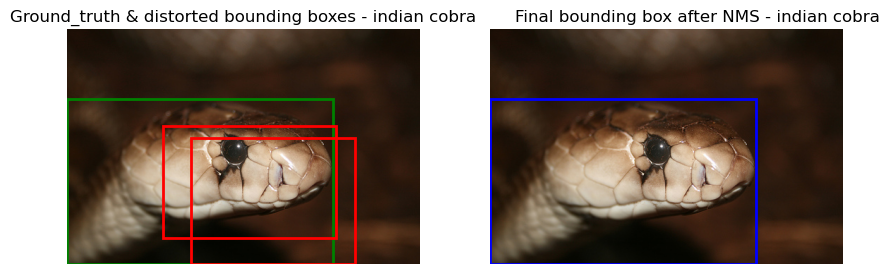

Annotation file not found for image: n01748264_5249.JPEG


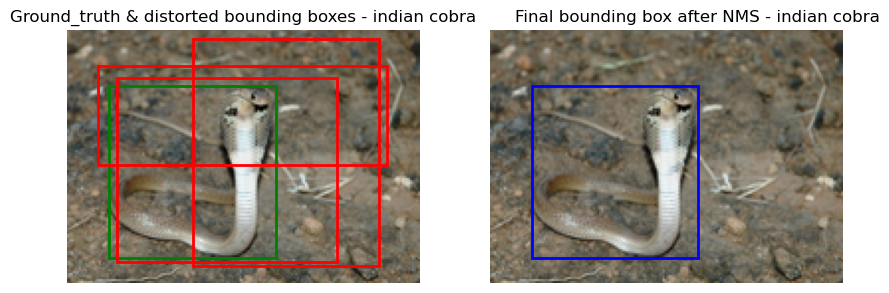

Annotation file not found for image: n01748264_3744.JPEG


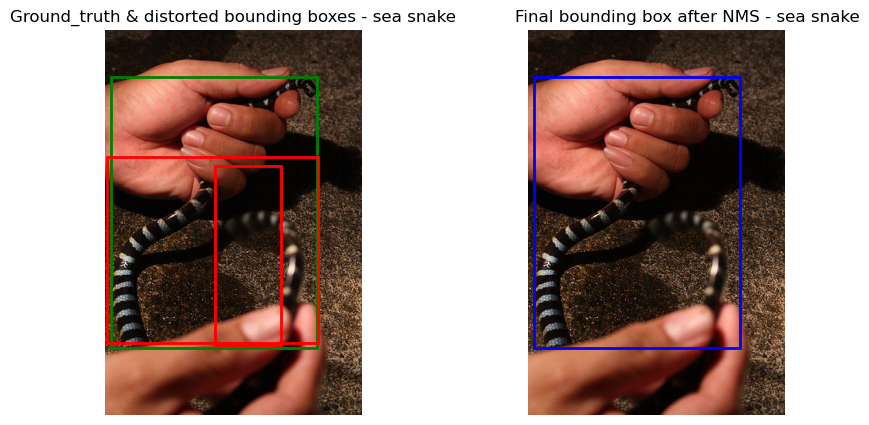

Annotation file not found for image: n01751748_6623.JPEG
Annotation file not found for image: n01751748_7386.JPEG


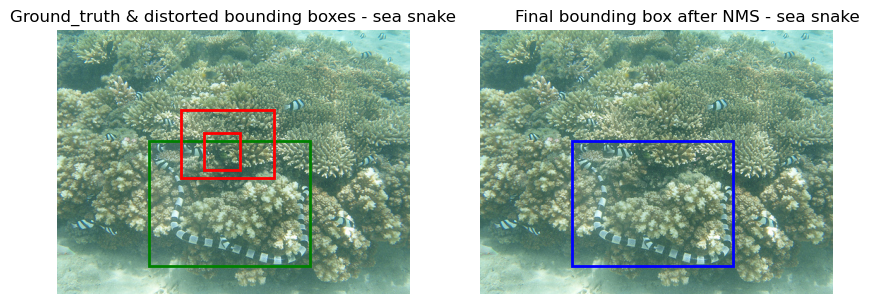

Annotation file not found for image: n01751748_6767.JPEG


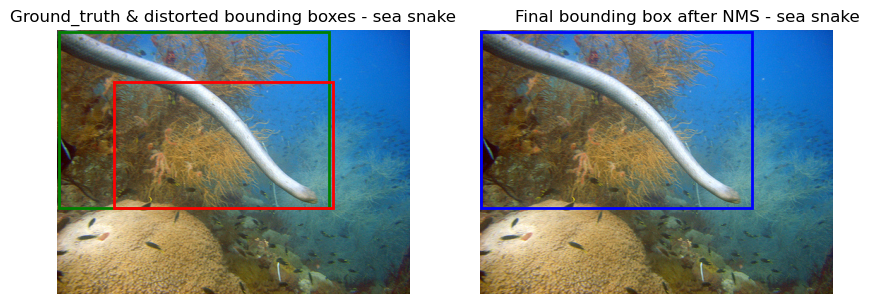

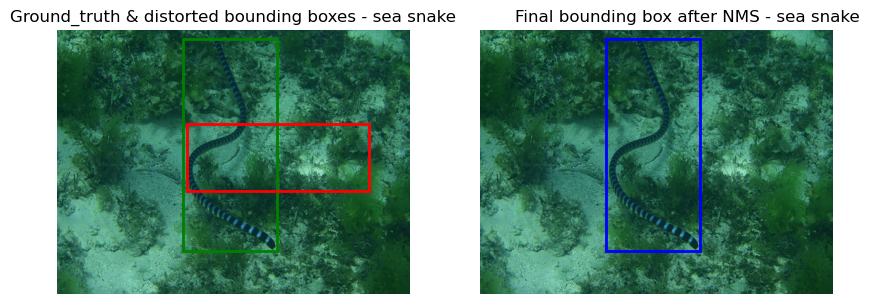

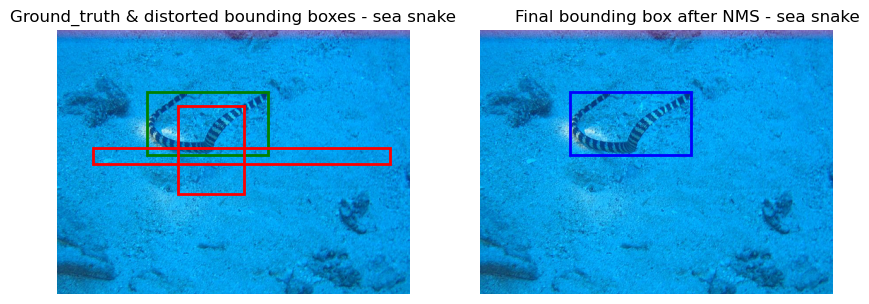

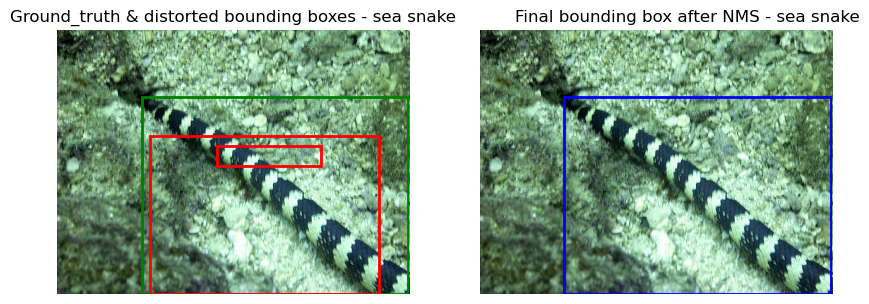

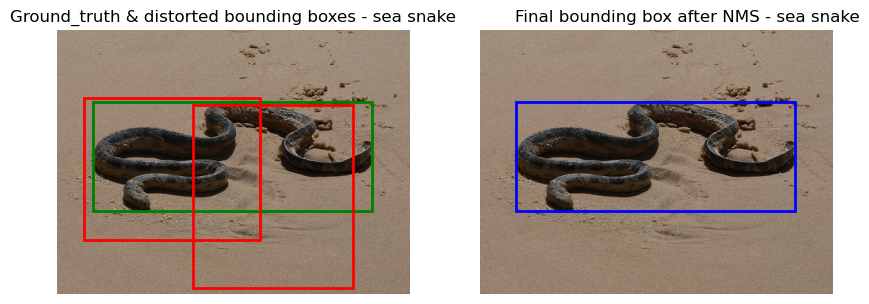

Annotation file not found for image: n01737021_2534.JPEG


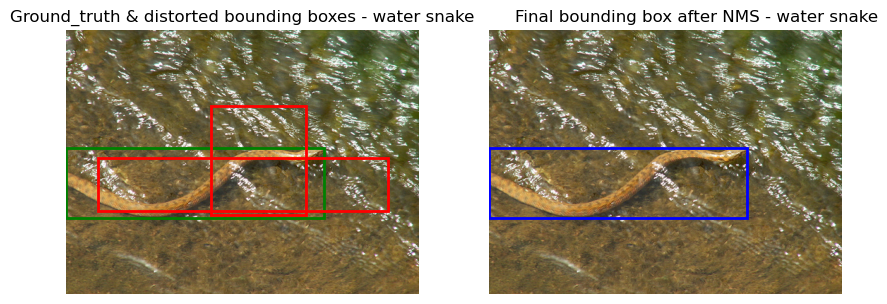

Annotation file not found for image: n01737021_3350.JPEG


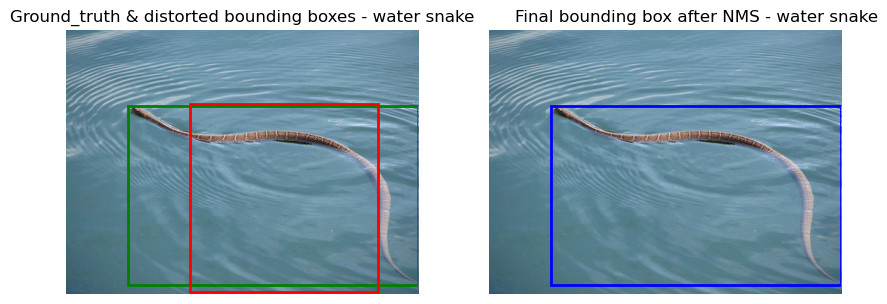

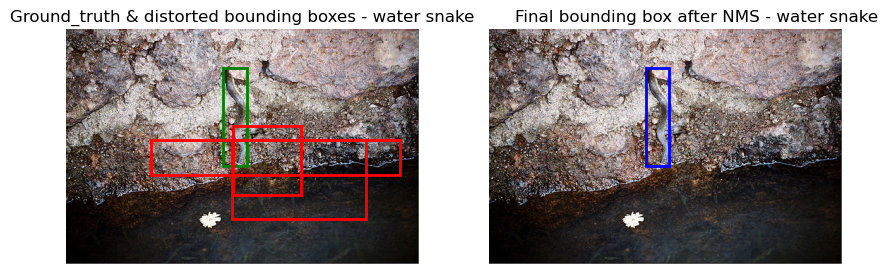

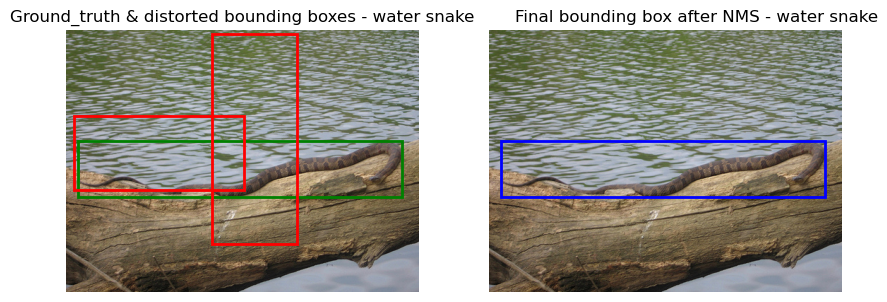

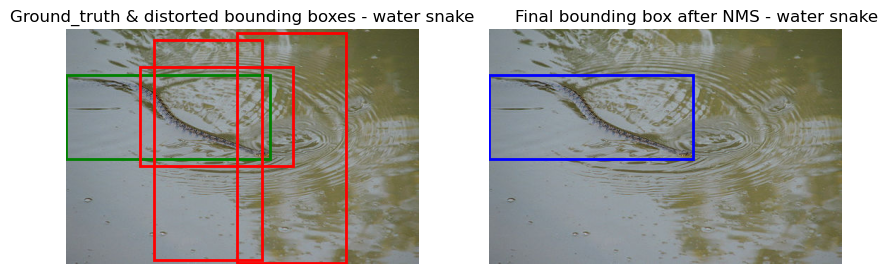

Annotation file not found for image: n01737021_2078.JPEG


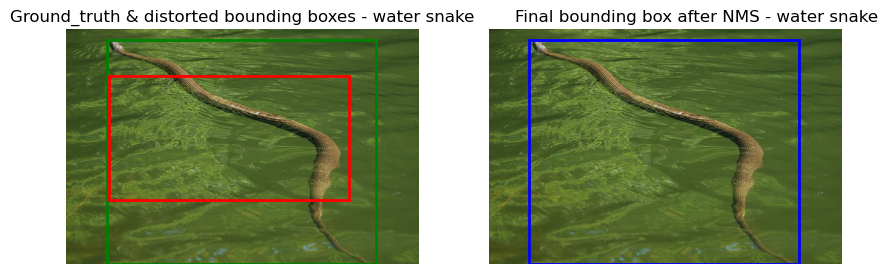

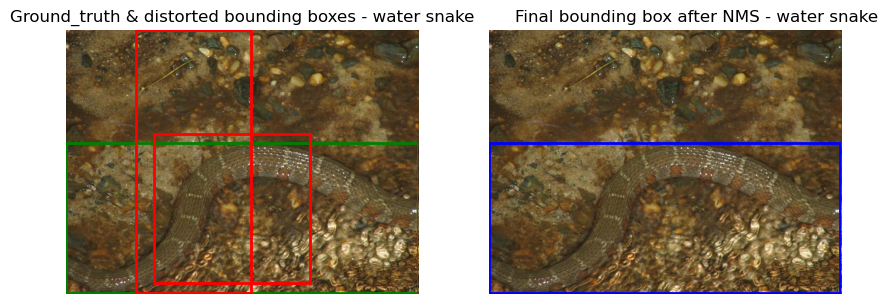

In [34]:
# Function to plot annotations and NMS 
def plot_annotations(images_folder, category_id):
    category_name = category_id  # Use category_id directly
    image_files = os.listdir(os.path.join(images_folder, category_id))
    random_images = random.sample(image_files, min(10, len(image_files)))

    for image in random_images:
        image_path = os.path.join(images_folder, category_id, image)
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        xml_path = os.path.join(annotation_dir, category_id, xml_file)  # Corrected path for annotation file

        if os.path.isfile(xml_path):
            tree = ET.parse(xml_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].imshow(img)
            ax[0].set_title(f"Ground_truth and distorted bounding boxes - {category_name}")
            ax[0].axis('off')

            # Ground truth bounding boxes
            gt_boxes = []
            for obj in root.findall('object'):
                xmin = int(obj.find('bndbox').find('xmin').text)
                ymin = int(obj.find('bndbox').find('ymin').text)
                xmax = int(obj.find('bndbox').find('xmax').text)
                ymax = int(obj.find('bndbox').find('ymax').text)
                prob = 1.0  # Ground truth boxes have probability 1.0
                gt_boxes.append([xmin, ymin, xmax, ymax, prob])
                # Draw the ground truth box with probability score
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
                ax[0].add_patch(rect)
                
            # bounding boxes
            pred_boxes = []
            for idx in range(random.randint(1, 3)):  # Simulate 1 to 3 predicted boxes per image
                xmin = random.randint(0, img.shape[1] // 2)
                ymin = random.randint(0, img.shape[0] // 2)
                xmax = random.randint(img.shape[1] // 2, img.shape[1])
                ymax = random.randint(img.shape[0] // 2, img.shape[0])
                # Assign probability based on proximity to ground truth
                prob = random.uniform(0.7,1.0) if calculate_iou([xmin, ymin, xmax, ymax], gt_boxes[0][:4]) > 0.5 else random.uniform(0.1,0.5)
                pred_boxes.append([xmin, ymin, xmax, ymax, prob])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
                ax[0].add_patch(rect)
              

            ax[0].imshow(img)
            ax[0].set_title(f"Ground_truth & distorted bounding boxes - {category_name}")
            ax[0].axis('off')

            # Perform Non-Maximum Suppression (NMS) 
            selected_boxes = non_max_suppression(gt_boxes + pred_boxes)

           # Display the selected boxes after NMS
            for selected_box in selected_boxes:
                rect = patches.Rectangle((selected_box[0], selected_box[1]), selected_box[2] - selected_box[0], selected_box[3] - selected_box[1], linewidth=2, edgecolor='b', facecolor='none', fill=False)
                ax[1].imshow(img)
                ax[1].add_patch(rect)
                ax[1].set_title(f"            Final bounding box after NMS - {category_name}")
                ax[1].axis('off')

            plt.show()
        else:
            print(f"Annotation file not found for image: {image}")  # Moved the else statement here
            

 for category in categories:
    plot_annotations(dataset_dir, category)
